In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

import matplotlib.pyplot as plt

In [2]:
x= pd.read_csv("fashion-mnist_train.csv")
xtrain = x.iloc[:,1:].values
ytrain = x.iloc[:,0].values

In [3]:
y=pd.read_csv("fashion-mnist_test.csv")
xtest = y.iloc[:,1:].values
ytest=y.iloc[:,0].values

In [4]:
xtrain = xtrain.reshape(-1,28,28,1).astype('float32')/255.0
xtest=xtest.reshape(-1,28,28,1).astype('float32')/255.0

In [5]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
model.fit(xtrain.astype(np.float32), ytrain.astype(np.float32), epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8041 - loss: 0.5526 - val_accuracy: 0.8944 - val_loss: 0.3026
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8985 - loss: 0.2773 - val_accuracy: 0.8998 - val_loss: 0.2805
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9172 - loss: 0.2239 - val_accuracy: 0.9048 - val_loss: 0.2629
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9323 - loss: 0.1856 - val_accuracy: 0.9037 - val_loss: 0.2740
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9441 - loss: 0.1544 - val_accuracy: 0.9104 - val_loss: 0.2679


In [9]:
loss,accuracy = model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9127 - loss: 0.2514


In [10]:
x.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
labels=['t_shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle_boots']

In [12]:
predictions=model.predict(xtest[123:124])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [13]:
label=labels[np.argmax(predictions)]

In [14]:
print(label)

coat


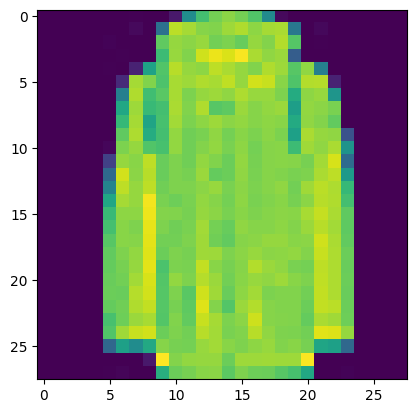

In [15]:
plt.imshow(xtest[123:124][0])